In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# TODO: create seperate a file for preprocessed data??
df = pd.read_csv('data/average-monthly-surface-temperature.csv')
df.reset_index()
df = df.rename(columns={'Average surface temperature': 'Daily Average Temp', 'Average surface temperature.1': 'Monthly Average Temp'})

In [3]:
df.sample(5)

,Entity,Code,year,Day,Average Low Temp,Average High Temp
40148,Comoros,COM,1970,1970-09-15,23.528380,24.711893
96151,Jordan,JOR,1962,1962-08-15,28.630346,19.282870
156924,Senegal,SEN,2012,2012-01-15,25.184510,28.598068
23173,Bosnia and Herzegovina,BIH,2001,2001-02-15,2.549963,10.090752
161177,Slovenia,SVN,1941,1941-06-15,16.695732,7.278540


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Entity             198900 non-null  object 
 1   Code               198900 non-null  object 
 2   year               198900 non-null  int64  
 3   Day                198900 non-null  object 
 4   Average Low Temp   198900 non-null  float64
 5   Average High Temp  198900 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.1+ MB


In [5]:
df.describe()

,year,Average Low Temp,Average High Temp
count,198900.00000,198900.000000,198900.000000
mean,1982.00000,18.072073,18.072073
std,24.53575,10.246142,8.710114
min,1940.00000,-36.240032,-21.529121
25%,1961.00000,12.304079,10.569263
50%,1982.00000,22.055794,21.856285
75%,2003.00000,25.317015,25.142885
max,2024.00000,39.889374,29.794220


# Missing values

In [6]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# there are no missing values

Missing Values:
Entity               0
Code                 0
year                 0
Day                  0
Average Low Temp     0
Average High Temp    0
dtype: int64


# Duplicates

In [7]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

# there are no duplicate rows

Duplicate Rows:
Empty DataFrame
Columns: [Entity, Code, year, Day, Average Low Temp, Average High Temp]
Index: []


# Convert Data Types

In [8]:
df["Day"] = pd.to_datetime(df["Day"])
df

,Entity,Code,year,Day,Average Low Temp,Average High Temp
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695
...,...,...,...,...,...,...
198895,Zimbabwe,ZWE,2024,2024-08-15,20.559408,22.921250
198896,Zimbabwe,ZWE,2024,2024-09-15,23.642931,22.921250
198897,Zimbabwe,ZWE,2024,2024-10-15,24.407030,22.921250
198898,Zimbabwe,ZWE,2024,2024-11-15,25.672321,22.921250


# Verifying Entity and Code columns

In [9]:
for name, num_of_occurrences in df['Entity'].value_counts().items():
    # check if every country has the same number of entries
    if num_of_occurrences != 1020:
        print(name, "has", num_of_occurrences)

for name in df["Entity"].unique():
    # check if every country name (Entity column) matches the country code 
    correct_code = df.loc[df["Entity"] == name].iloc[0]["Code"]      
    incorrect_rows = df.loc[(df["Entity"] == name) & (df["Code"] != correct_code)]
    if incorrect_rows.shape[0] > 0:
        display(incorrect_rows)


# Drop Unnecessary Columns

In [10]:
# having both "Enity" and "Code" is redundant, so I'm dropping a column
df.drop("Entity", axis=1, inplace=True, errors='ignore')
df

,Code,year,Day,Average Low Temp,Average High Temp
0,AFG,1940,1940-01-15,-2.032494,11.327695
1,AFG,1940,1940-02-15,-0.733503,11.327695
2,AFG,1940,1940-03-15,1.999134,11.327695
3,AFG,1940,1940-04-15,10.199754,11.327695
4,AFG,1940,1940-05-15,17.942135,11.327695
...,...,...,...,...,...
198895,ZWE,2024,2024-08-15,20.559408,22.921250
198896,ZWE,2024,2024-09-15,23.642931,22.921250
198897,ZWE,2024,2024-10-15,24.407030,22.921250
198898,ZWE,2024,2024-11-15,25.672321,22.921250


# Data Plots

<Axes: xlabel='year', ylabel='Temperature (°C)'>

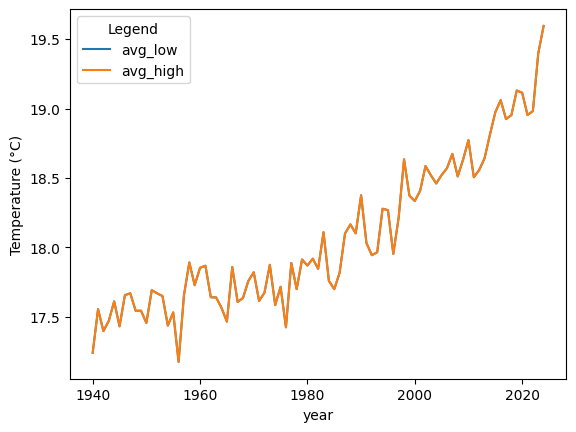

In [ ]:
# plot average temperatures for each year
avg_temps_by_year = df.groupby("year").agg(
    avg_low=("Average Low Temp", "mean"),
    avg_high=("Average High Temp", "mean")
).reset_index()

avg_temps_by_year = pd.melt(avg_temps_by_year, ["year"], value_name='Temperature (°C)', var_name="Legend")
sns.lineplot(data=avg_temps_by_year, x="year", y='Temperature (°C)', hue="Legend")

<Axes: xlabel='Month', ylabel='Temperature (°C)'>

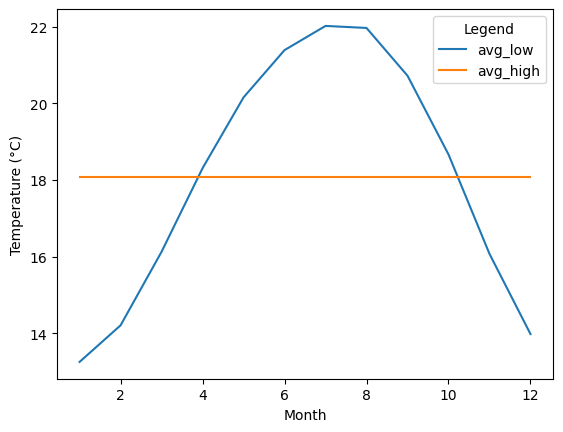

In [52]:
# plot average temperatures for each month (Day column)
df['Month'] = pd.to_datetime(df['Day']).dt.month
avg_temps_by_month = df.groupby("Month").agg(
    avg_low=("Average Low Temp", "mean"),
    avg_high=("Average High Temp", "mean")
).reset_index()

avg_temps_by_month = pd.melt(avg_temps_by_month, ["Month"], value_name='Temperature (°C)', var_name="Legend")
sns.lineplot(data=avg_temps_by_month, x="Month", y='Temperature (°C)', hue="Legend")
